In [1]:
from skimpy import skim #data summary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import charset_normalizer
import seaborn as sns
import plotly.express as px #interactive visualization
import charset_normalizer

In [2]:
with open("visualizing_global_co2_data_cleaned.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))
print(result)

{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}


In [3]:
data = pd.read_csv('visualizing_global_co2_data_cleaned.csv', encoding = 'ascii')
df = pd.DataFrame(data)
df

,country,year,iso_code,population,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
0,Afghanistan,1949,AFG,7356890.0,0.000,0.000,0.015,NaN,NaN,8.039,...,0.000,NaN,0.0,0.160,0.000,0.129,0.000,0.000,0.000,0.0
1,Afghanistan,1950,AFG,7480464.0,0.000,0.000,0.084,0.070,475.000,8.585,...,0.000,0.0,0.0,0.157,0.004,0.129,0.000,0.000,0.000,0.0
2,Afghanistan,1951,AFG,7571542.0,0.000,0.000,0.092,0.007,8.696,9.142,...,0.000,0.0,0.0,0.162,0.004,0.129,0.000,0.000,0.001,0.0
3,Afghanistan,1952,AFG,7667534.0,0.000,0.000,0.092,0.000,0.000,9.948,...,0.001,0.0,0.0,0.172,0.003,0.129,0.000,0.000,0.001,0.0
4,Afghanistan,1953,AFG,7764549.0,0.000,0.000,0.106,0.015,16.000,10.915,...,0.001,0.0,0.0,0.185,0.003,0.129,0.000,0.000,0.001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23489,Zimbabwe,2017,ZWE,14751101.0,0.469,0.032,9.596,-0.937,-8.899,19.086,...,0.024,0.0,0.0,0.219,0.026,0.114,0.001,0.001,0.002,0.0
23490,Zimbabwe,2018,ZWE,15052191.0,0.558,0.037,11.795,2.199,22.920,20.626,...,0.025,0.0,0.0,0.211,0.033,0.114,0.001,0.001,0.002,0.0
23491,Zimbabwe,2019,ZWE,15354606.0,0.570,0.037,11.115,-0.681,-5.772,19.432,...,0.025,0.0,0.0,0.183,0.030,0.113,0.001,0.001,0.002,0.0
23492,Zimbabwe,2020,ZWE,15669663.0,0.570,0.036,10.608,-0.507,-4.559,18.485,...,0.025,0.0,0.0,0.194,0.030,0.112,0.001,0.001,0.002,0.0


In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 23494  │ │ float64     │ 52    │                                                          │
│ │ Number of columns │ 55     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃      ┃       ┃          ┃           ┃        ┃         ┃         ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA   ┃ NA %  ┃ mean     ┃ sd        ┃ p0     ┃ p25     ┃ p50     ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ year     │    0 │     0 │     1962 │     42.91 │   1850 │    1935 │    1970 │     1997 │     2021 │ ▂▂▃▅▇▇ │  │
│ │ populati │  926 │  3.94 │ 92860000 │ 418500000 │   1480 │ 1415000 │ 5340000 │ 21760000 │ 79090000 │   ▇    │  │
│ │ on       │      │       │          │           │        │         │         │          │       00 │        │  │
│ │ cement_c │ 3502 │ 14.91 │    10.48 │     70.27 │      0 │       0 │   0.116 │    1.287 │     1673 │   ▇    │  │
│ │ o2       │      │       │          │           │        │         │         │          │          │        │  │
│ │ cement_c │ 3574 │ 15.21 │  0.07293 │    0.1289 │      0 │       0 │   0.016 │    0.104 │    2.574 │   ▇    │  │
│ │ o2_per_c │      │       │          │           │        │         │         │          │          │        │  │
│ │ apita    │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2      │    0 │     0 │    348.1 │      1755 │      0 │   0.575 │    5.27 │    50.21 │    37120 │   ▇    │  │
│ │ co2_grow │  269 │  1.14 │     7.04 │     65.47 │  -1818 │  -0.011 │   0.073 │    1.268 │     1860 │    ▇▁  │  │
│ │ th_abs   │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_grow │  307 │  1.31 │    21.44 │     725.4 │   -100 │  -0.893 │   4.088 │    10.93 │   102300 │   ▇    │  │
│ │ th_prct  │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_incl │  953 │  4.06 │      535 │      2153 │   -187 │   6.346 │   28.74 │    129.1 │    41640 │   ▇    │  │
│ │ uding_lu │      │       │          │           │        │         │         │          │          │        │  │
│ │ c        │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_incl │ 1232 │  5.24 │    7.797 │     96.02 │  -2318 │  -0.722 │   0.103 │    2.747 │     2247 │     ▇  │  │
│ │ uding_lu │      │       │          │           │        │         │         │          │          │        │  │
│ │ c_growth │      │       │          │           │        │         │         │          │          │        │  │
│ │ _abs     │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_incl │ 1166 │  4.96 │    13.01 │     732.1 │ -36

In [5]:
 info = pd.DataFrame({
    "Count":df.shape[0],
    "Null":df.isnull().sum(),
    "Null %":df.isnull().mean() * 100,
    "Zeros":(df == 0).sum(),
    "Zeros %":(df == 0).mean() * 100,
    "Unique":df.nunique(),
    "Duplicated":(df.duplicated() == True).sum()
})
info

,Count,Null,Null %,Zeros,Zeros %,Unique,Duplicated
country,23494,0,0.000000,0,0.000000,237,0
year,23494,0,0.000000,0,0.000000,172,0
iso_code,23494,2786,11.858347,0,0.000000,219,0
population,23494,926,3.941432,0,0.000000,22522,0
cement_co2,23494,3502,14.905933,7137,30.377969,5261,0
cement_co2_per_capita,23494,3574,15.212395,7350,31.284583,691,0
co2,23494,0,0.000000,102,0.434153,14459,0
co2_growth_abs,23494,269,1.144973,1013,4.311739,8951,0
co2_growth_prct,23494,307,1.306717,850,3.617945,14923,0
co2_including_luc,23494,953,4.056355,11,0.046820,18711,0


#Eliminar datos C02 = 0

In [8]:
co2_zeros = (df["co2"] == 0).sum()

df = df.drop(df[df["co2"] == 0].index)
print(co2_zeros)

0


#Total Co2 agrupado en años

   year  total_co2
0  1850    944.824
1  1851    944.689
2  1852    984.086
3  1853   1025.620
4  1854   1209.253
     year   total_co2
167  2017  160554.783
168  2018  163412.616
169  2019  164192.960
170  2020  156631.574
171  2021  164670.489


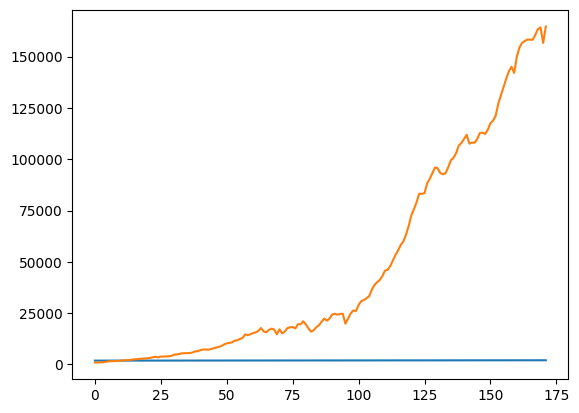

In [12]:
co2_data = df.groupby("year")["co2"].sum().reset_index(name = "total_co2")
print(co2_data.head())
print(co2_data.tail())

plt.plot(co2_data)

   year  total_co2
0  1850        0.0
1  1851        0.0
2  1852        0.0
3  1853        0.0
4  1854        0.0
     year  total_co2
167  2017   1856.108
168  2018   1946.745
169  2019   2071.768
170  2020   1935.357
171  2021   1979.794


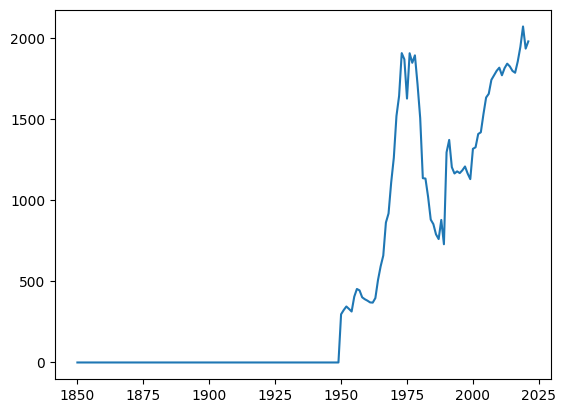

In [16]:
co2_data = df.groupby("year")["flaring_co2"].sum().reset_index(name = "total_co2")
print(co2_data.head())
print(co2_data.tail())

plt.plot(co2_data["year"], co2_data["total_co2"])